In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [7]:
# Import the requests library.
import requests

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | zhangjiakou
Processing Record 3 of Set 1 | clyde river
Processing Record 4 of Set 1 | kirakira
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | ushirombo
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | los llanos de aridane
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | porto novo
Processing Record 15 of Set 1 | the valley
Processing Record 16 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | beringovskiy
Processing Record 19 of Set 1 | egvekinot
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 |

Processing Record 38 of Set 4 | plock
Processing Record 39 of Set 4 | hammerfest
Processing Record 40 of Set 4 | qui nhon
Processing Record 41 of Set 4 | santo tomas
Processing Record 42 of Set 4 | ishigaki
Processing Record 43 of Set 4 | haicheng
Processing Record 44 of Set 4 | mullaitivu
City not found. Skipping...
Processing Record 45 of Set 4 | novoilinsk
Processing Record 46 of Set 4 | sambava
Processing Record 47 of Set 4 | ekhabi
Processing Record 48 of Set 4 | kavieng
Processing Record 49 of Set 4 | khash
Processing Record 50 of Set 4 | rio gallegos
Processing Record 1 of Set 5 | metro
Processing Record 2 of Set 5 | nuevo progreso
Processing Record 3 of Set 5 | avera
Processing Record 4 of Set 5 | malakal
Processing Record 5 of Set 5 | port macquarie
Processing Record 6 of Set 5 | chuy
Processing Record 7 of Set 5 | udomlya
Processing Record 8 of Set 5 | meulaboh
Processing Record 9 of Set 5 | reefton
City not found. Skipping...
Processing Record 10 of Set 5 | narsaq
Processing

Processing Record 26 of Set 8 | ballina
Processing Record 27 of Set 8 | alekseyevka
Processing Record 28 of Set 8 | izumo
Processing Record 29 of Set 8 | tessalit
Processing Record 30 of Set 8 | ponta grossa
Processing Record 31 of Set 8 | moose factory
Processing Record 32 of Set 8 | moussoro
Processing Record 33 of Set 8 | marrakesh
Processing Record 34 of Set 8 | ushumun
Processing Record 35 of Set 8 | mount isa
Processing Record 36 of Set 8 | tarudant
City not found. Skipping...
Processing Record 37 of Set 8 | northam
Processing Record 38 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 39 of Set 8 | marzuq
Processing Record 40 of Set 8 | kungurtug
Processing Record 41 of Set 8 | salto del guaira
Processing Record 42 of Set 8 | arvin
Processing Record 43 of Set 8 | ucluelet
Processing Record 44 of Set 8 | anadyr
Processing Record 45 of Set 8 | khandbari
Processing Record 46 of Set 8 | luwuk
Processing Record 47 of Set 8 | santa isabel do rio negro
Processing Recor

Processing Record 12 of Set 12 | madera
Processing Record 13 of Set 12 | sanica
Processing Record 14 of Set 12 | ugoofaaru
Processing Record 15 of Set 12 | skjervoy
Processing Record 16 of Set 12 | bundaberg
Processing Record 17 of Set 12 | atar
Processing Record 18 of Set 12 | kupang
Processing Record 19 of Set 12 | ola
Processing Record 20 of Set 12 | kargasok
Processing Record 21 of Set 12 | constantine
Processing Record 22 of Set 12 | wiset chai chan
Processing Record 23 of Set 12 | mabaruma
Processing Record 24 of Set 12 | cefalu
Processing Record 25 of Set 12 | ko samui
Processing Record 26 of Set 12 | valer
Processing Record 27 of Set 12 | coos bay
Processing Record 28 of Set 12 | orlik
Processing Record 29 of Set 12 | batemans bay
Processing Record 30 of Set 12 | udachnyy
Processing Record 31 of Set 12 | rocha
Processing Record 32 of Set 12 | sisophon
Processing Record 33 of Set 12 | petit goave
Processing Record 34 of Set 12 | banda aceh
Processing Record 35 of Set 12 | boulsa

In [10]:
len(city_data)

566

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,35.71,87,0,8.05,CL,2021-06-13 23:22:17
1,Zhangjiakou,40.8100,114.8794,67.87,88,99,2.28,CN,2021-06-13 23:25:22
2,Clyde River,70.4692,-68.5914,32.23,86,90,11.50,CA,2021-06-13 23:25:22
3,Kirakira,-10.4544,161.9205,84.04,64,70,9.48,SB,2021-06-13 23:24:44
4,Arraial Do Cabo,-22.9661,-42.0278,69.30,61,90,11.30,BR,2021-06-13 23:25:23
5,Ushirombo,-3.4919,31.9639,66.90,62,75,3.22,TZ,2021-06-13 23:25:24
6,Butaritari,3.0707,172.7902,81.73,78,86,9.26,KI,2021-06-13 23:21:51
7,Ushuaia,-54.8000,-68.3000,37.06,81,75,23.02,AR,2021-06-13 23:25:10
8,Lebu,-37.6167,-73.6500,50.43,77,100,17.07,CL,2021-06-13 23:25:25
9,Jamestown,42.0970,-79.2353,76.64,71,20,3.00,US,2021-06-13 23:25:25


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-06-13 23:22:17,-53.1500,-70.9167,35.71,87,0,8.05
1,Zhangjiakou,CN,2021-06-13 23:25:22,40.8100,114.8794,67.87,88,99,2.28
2,Clyde River,CA,2021-06-13 23:25:22,70.4692,-68.5914,32.23,86,90,11.50
3,Kirakira,SB,2021-06-13 23:24:44,-10.4544,161.9205,84.04,64,70,9.48
4,Arraial Do Cabo,BR,2021-06-13 23:25:23,-22.9661,-42.0278,69.30,61,90,11.30
5,Ushirombo,TZ,2021-06-13 23:25:24,-3.4919,31.9639,66.90,62,75,3.22
6,Butaritari,KI,2021-06-13 23:21:51,3.0707,172.7902,81.73,78,86,9.26
7,Ushuaia,AR,2021-06-13 23:25:10,-54.8000,-68.3000,37.06,81,75,23.02
8,Lebu,CL,2021-06-13 23:25:25,-37.6167,-73.6500,50.43,77,100,17.07
9,Jamestown,US,2021-06-13 23:25:25,42.0970,-79.2353,76.64,71,20,3.00


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

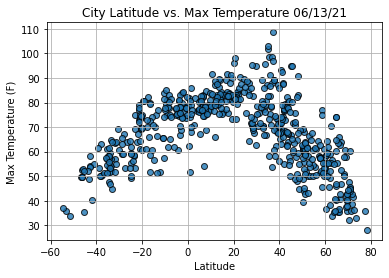

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

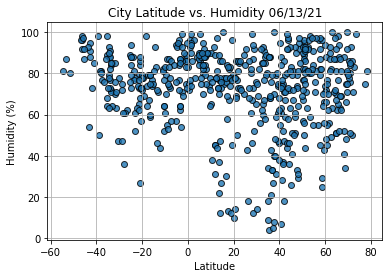

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

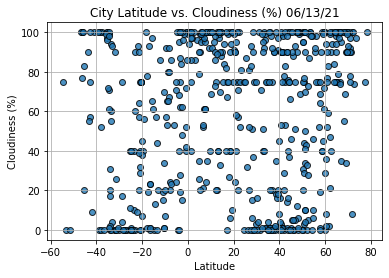

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

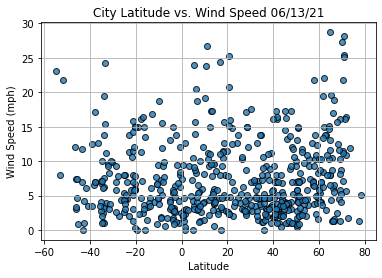

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                   The Valley
Country                        AI
Date          2021-06-13 23:25:27
Lat                        18.217
Lng                      -63.0578
Max Temp                     81.1
Humidity                       78
Cloudiness                     40
Wind Speed                   11.5
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Zhangjiakou,CN,2021-06-13 23:25:22,40.8100,114.8794,67.87,88,99,2.28
2,Clyde River,CA,2021-06-13 23:25:22,70.4692,-68.5914,32.23,86,90,11.50
6,Butaritari,KI,2021-06-13 23:21:51,3.0707,172.7902,81.73,78,86,9.26
9,Jamestown,US,2021-06-13 23:25:25,42.0970,-79.2353,76.64,71,20,3.00
10,Los Llanos De Aridane,ES,2021-06-13 23:25:25,28.6585,-17.9182,67.75,92,75,14.97


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

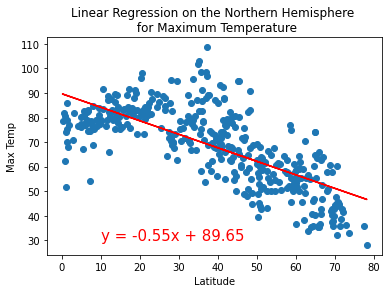

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,30))

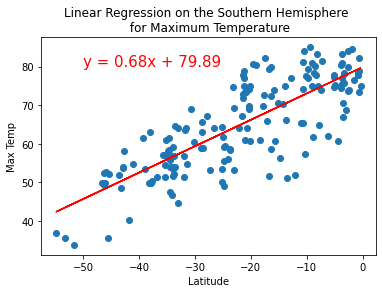

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

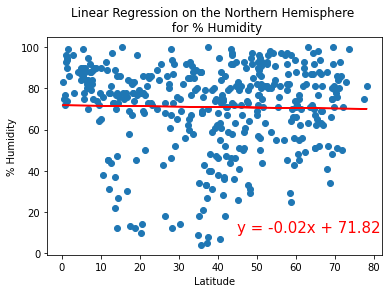

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,10))

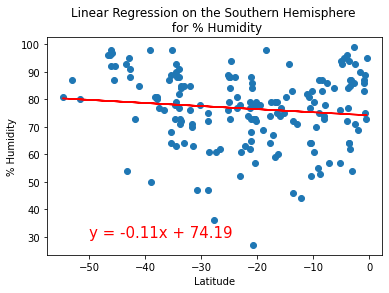

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,30))

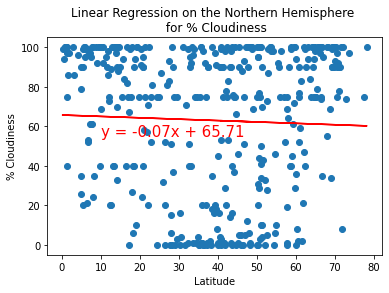

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

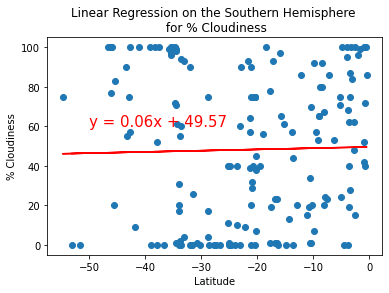

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

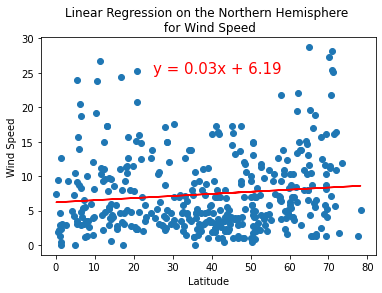

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed', (25,25))

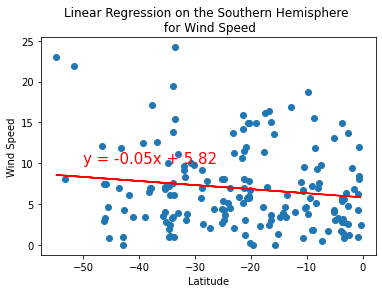

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,10))